<a href="https://colab.research.google.com/github/renatagsr/aprendizado_data_science/blob/master/An%C3%A1lise_explorat%C3%B3ria_de_dados_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - EDA (Análise Exploratória de Dados)

<center><img width = '50%' src = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/350px-Data_visualization_process_v1.png"></center>

A análise exploratória de dados é o ato de analisar conjuntos de dados a fim de resumir as suas principais características, grande parte das vezes utiliza-se métodos visuais. É utilizada para ver o que os dados podem dizer além da modelagem formal.

No Python o EDA utiliza visualização de dados para obter padrões e insights criativos. Além disso envolve a elaboração de conjuntos de dados para a análise, removendo as possíveis irregularidades dos dados.

Uma EDA bem feita irá facilitar o processo de machine learning. 

Esse notebook foi produzido com base do seguinte artigo do Towards Data Science: https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

Data set disponível em: https://github.com/Kaushik-Varma/Marketing_Data_Analysis


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv")
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


Percebe-se que as duas primeiras linhas possuem uma discrepância na forma que os dados são apresentados, portanto os dados serão lidos novamente ignorando essas duas linhas.

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv", skiprows = 2)
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Ao analisar o conjunto de dados percebe que a coluna "customerid" não tem utilidade, portanto será feita a retirada dela. E a coluna "jobedu" será dividia em "job" e "educacation" visto que ela está fornecendo duas informações em uma coluna só, ao dividir irá facilitar a visualização e análises. 

In [4]:
data.drop('customerid', axis = 1, inplace = True)
data['job'] = data['jobedu'].apply(lambda x: x.split(',')[0])
data['education'] = data['jobedu'].apply(lambda x: x.split(',')[1])
data.drop('jobedu', axis = 1, inplace = True)
data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


## Missing values

É necessário descobrir se há colunas que possue dados nulos e se houver, qual coluna é.

In [5]:
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Percebe-se que há três colunas que possuem valores perdidos, para resolver isso poderá retirar eles ou substituir por outros valores (desde que isso não interfira na análise).

In [6]:
data = data[~data.age.isnull()].copy()
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Visto que a coluna "month" possui objetos irá ser feito o cálculo do "mode" dela e a troca pelos valores nulos.

In [7]:
month_mode = data.month.mode()[0]
data.month.fillna(month_mode, inplace = True)
data.month.isnull().sum()

0

Já para a coluna "response" é melhor fazer a retirada dos dados faltantes visto que colocar outros dados pode afetar a análise.

In [8]:
data = data[~data.response.isnull()].copy()
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Análise univariada

A análise univariada é quando a análise de dados é feita em cima de apenas uma variável ou coluna.

### Análise categórica univariada não ordenada 

Quando uma variável categórica não possui uma ordem definida e vai fazer uma análise sobre ela terá uma análise categórica univariada não ordenada . No dataset que está sendo utilizada possui a coluna "job", ela é um exemplo desse tipo de variável já que é dividida por subcategorias que não possuem peso umas sobre as outras.

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64


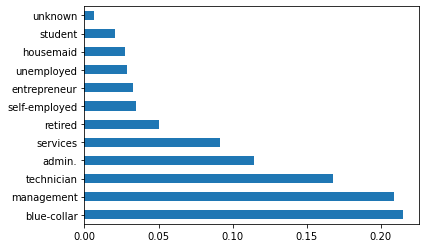

In [9]:
print(data.job.value_counts(normalize = True))

data.job.value_counts(normalize = True).plot.barh()
plt.show()

Percebe-se que com resultado das porcentagens de todas as subcategorias da coluna "job" é possível saber qual subcategoria tem o maior número de pessoas trabalhando nela, mas com o gráfico é muito mais visual e rápido, apenas batendo o olho é possível perceber qual é a subcategoria que possui mais empregados. Com isso percebe-se que as análises gráficas e a forma como mostrar os dados é de grande importância para que as pessoas possam entender com maior facilidade.

### Análise categórica univariada ordenada 

Variáveis ordenadas são as que possuem um rank natural de ordem, dentro do dataset que está sendo utilizado os meses são um exemplo dessas variáveis.

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64


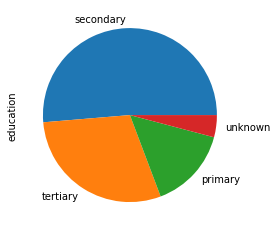

In [10]:
print(data.education.value_counts(normalize = True))
data.education.value_counts(normalize = True).plot.pie()
plt.show()

Através da análise do gráfico de pizza percebe-se que o número de pessoas que percentem ao grupo de "secondary" é o maior de todos, seguido do "terciário".

Um ponto muito importante a ser lembrado é que o gráfico de pizza, na maior parte das vezes, não é o mais recomendado para apresentar dados visto que é muito mais difícil analisar uma área circular tanto do ponto de vista visual quanto do ponto de vista númerico.

---

Se a coluna já for numérica pode-se analisar alguns outros parâmetros como a media, mediana, desvio padrão, entre outros. A função ".describe()" é extremamente útil nisso, visto que ao utilizar ela os cálculos são realizados automaticamente. 

In [11]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## Análise bivariada

O nome já é bem intuitivo, análise bivariada é a anállise considerando duas variáveis ou coluna a partir de um mesmo conjunto de dados.

### Análise numérica-numérica

É a análise de duas variáveis que são numéricas. Essa análise pode ser feita de três formas: 

*   Scatter plot;
*   Pair plot;
*   Correlation matrix.


**Scatter plot**

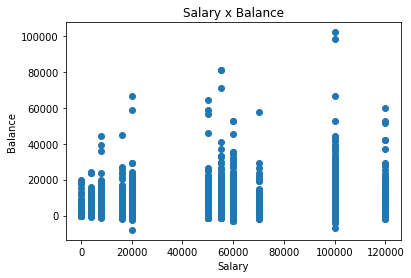

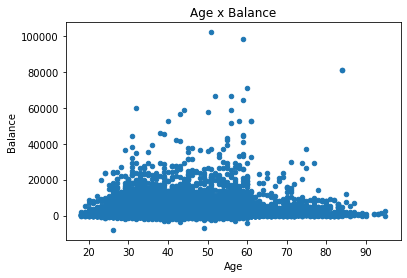

In [18]:
plt.scatter(data.salary, data.balance)
plt.title('Salary x Balance')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.show()

data.plot.scatter(x = 'age', y = 'balance')
plt.title('Age x Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

**Pair plot**

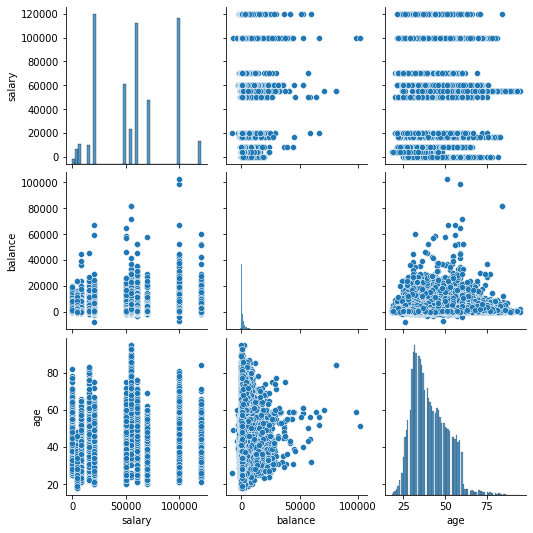

In [21]:
sns.pairplot(data = data, vars = ['salary', 'balance', 'age'])
plt.show()

**Correlation Matrix**

Visto que no *scatter plot* e no *pair plot* não se pode utilizar mais de duas variáveis no eixo x e y fica difícil ver a relação entre três variáveis númericas, para isso será utilizado o *correlation matrix*.

              age    salary   balance
age      1.000000  0.024513  0.097710
salary   0.024513  1.000000  0.055489
balance  0.097710  0.055489  1.000000


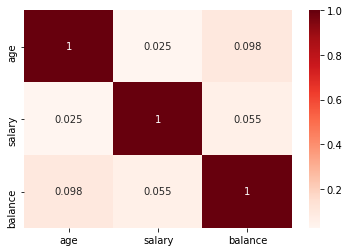

In [23]:
print(data[['age', 'salary', 'balance']].corr())
sns.heatmap(data[['age', 'salary', 'balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

### Análise categórica-numérica

É a análise de uma variável numérica e uma variável categórica através de um conjunto de dados. Essa análise é feita utilizando principalmente média, mediana e o *box plot*.

**Média**

In [24]:
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

**Mediana**

In [25]:
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

**Box plot**

O box plot ajuda na análise visual da média e da mediana.

Pelo do gráfico gerado abaixo percebe-se que há uma diferença bem grande para as pessoas que responderam "sim" para as que responderam "não".

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


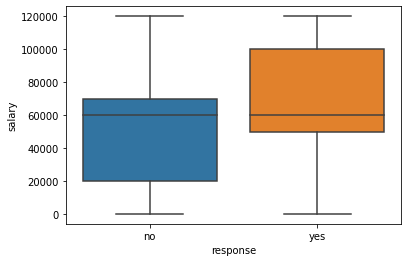

In [27]:
sns.boxplot(data.response, data.salary)
plt.show()

### Análise categórica-categórica

In [30]:
data['response_rate'] = np.where(data.response=='yes', 1,0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

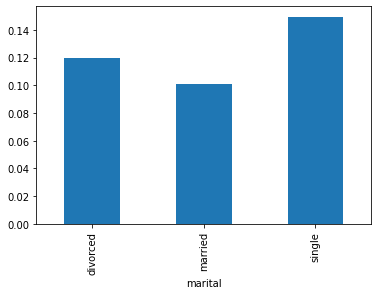

In [31]:
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

Pelo gráfico percebe-se que as respostas positivas são maiores para as pessoas solteiras.

---

## Análise multivariável

Como o próprio nome já diz, é a análise de múltiplas variáveis ou colunas de um mesmo conjunto de dados.

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


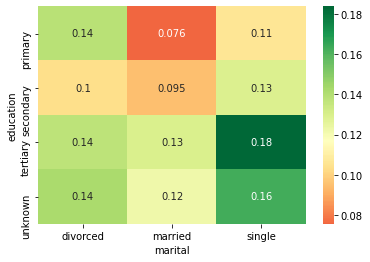

In [33]:
result = pd.pivot_table(data = data, index = 'education', columns = 'marital', values = 'response_rate')
print(result)

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

Pelo *heatmap* é perceptível que as pessoas casadas e que possuem educação primária (fundamental) são as que menos respondem positivamente à pesquisa e as pessoas solterias com ensino superior são as mais propensas a responder positivamente à pesquisa.

---

# Conclusão

Através das análises realizadas foi possível perceber como é feita a análise exploratória de dados e que ela ajuda a olhar além dos dados. Claro que há muitos outros pontos que podem ser analisados e utilizados para análise, isso irá variar do objetivo final de cada projeto.